<a href='https://colab.research.google.com/github/ishaqmarashy/red-light-traffic-violation-classification/blob/main/decision%20tree%20classifier.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

## Preprocess Data

In [196]:
import pandas as pd
import os
import numpy as np

csv_filename1 = "data/tv_noaa.csv"
df = pd.read_csv(csv_filename1)

In [197]:
df['Accident'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1781    Yes
1782    Yes
1783    Yes
1784    Yes
1785    Yes
Name: Accident, Length: 1786, dtype: object>

In [198]:
df.drop(columns=['Accident','Violation Type','Charge','Article','Contributed To Accident','Article','HAZMAT','Personal Injury','Fatal'],inplace=True)

In [199]:
df

,Latitude,Longitude,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,...,LONGITUDE,AWND,PGTM,PRCP,TMAX,WSF2,WSF5,TMIN,WDF2,WDF5
0,38.997645,-77.027105,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,2.2,2301.0,41.1,15.6,9.8,16.1,10.0,300.0,320.0
1,38.997566,-77.109724,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,3.4,1356.0,0.5,12.8,7.6,11.6,6.1,230.0,220.0
2,39.223205,-77.260313,No,Yes,No,No,No,No,MD,02 - Automobile,...,-75.12284,2.9,1452.0,0.0,26.7,6.7,10.7,11.1,230.0,230.0
3,39.057987,-76.968677,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,4.0,1231.0,0.0,18.9,8.1,11.6,7.2,10.0,360.0
4,38.999282,-77.026098,No,Yes,No,No,No,No,MD,02 - Automobile,...,-75.12284,0.9,2212.0,4.3,20.6,4.5,6.7,11.1,320.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,1.5,932.0,0.0,22.2,5.4,8.1,13.3,30.0,30.0
1782,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,1.0,1613.0,0.0,22.2,2.2,3.1,8.3,20.0,360.0
1783,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,0.8,1159.0,0.0,23.3,3.6,6.3,6.7,160.0,200.0
1784,39.144320,-77.067415,No,No,No,No,No,No,MD,02 - Automobile,...,-75.12284,3.8,1519.0,0.0,9.4,8.9,13.0,1.1,290.0,310.0


https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html

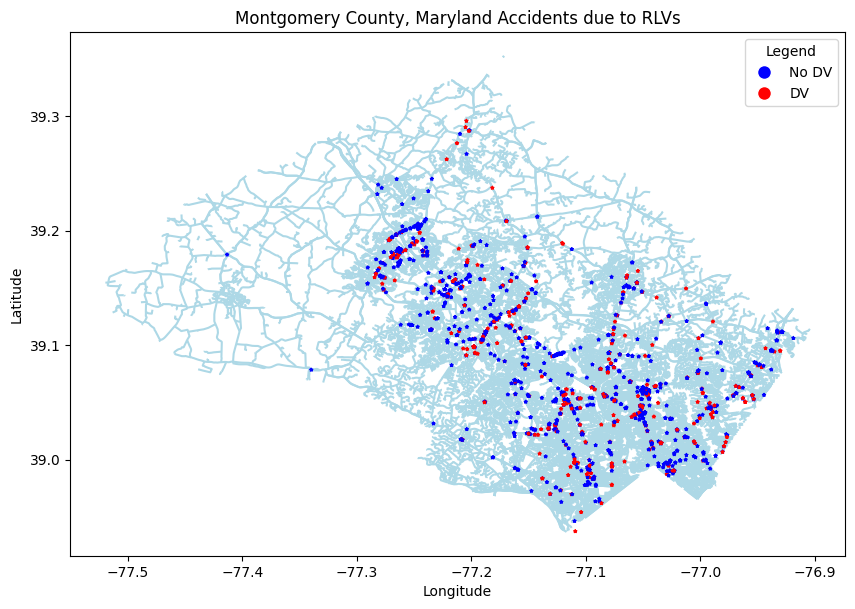

In [200]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

filtered_df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0) & (df['Longitude'] <= -76.9)& (df['Latitude'] >=38.93)]
montgomery_shapefile_path = './data/roads/tl_2019_24031_roads.shp'
montgomery_gdf = gpd.read_file(montgomery_shapefile_path)

geometry = [Point(xy) for xy in zip(filtered_df['Longitude'], filtered_df['Latitude'])]
geo_points = gpd.GeoDataFrame(filtered_df, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))

montgomery_gdf.plot(ax=ax, color='lightblue', edgecolor='black', zorder=1)
geo_points.plot(ax=ax, marker='*', color=filtered_df['DV'].map({0: 'blue', 1: 'red'}), markersize=5, zorder=2)

legend_labels = {0: 'No DV', 1: 'DV'}
ax.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
          [legend_labels[0], legend_labels[1]], title='Legend', loc='upper right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Montgomery County, Maryland Accidents due to RLVs')
plt.show()


In [201]:
df.drop(columns=['Latitude', 'Longitude'],inplace=True)

In [202]:
df.isna().sum()

Belts                 0
Property Damage       0
Commercial License    0
Commercial Vehicle    0
Alcohol               0
Work Zone             0
State                 0
VehicleType           0
Year                  1
Make                  0
Model                 0
Color                 5
Race                  0
Gender                0
Driver City           0
Driver State          0
DL State              1
DV                    0
DATE                  0
LATITUDE              0
LONGITUDE             0
AWND                  0
PGTM                  0
PRCP                  0
TMAX                  0
WSF2                  0
WSF5                  0
TMIN                  0
WDF2                  0
WDF5                  0
dtype: int64

In [203]:
import pandas as pd
from sklearn.impute import SimpleImputer


data_for_imputation = df.copy()

categorical_imputer = SimpleImputer(strategy='most_frequent')

imputed_values = categorical_imputer.fit_transform(data_for_imputation)

imputed_df = pd.DataFrame(imputed_values,columns=df.columns)

df= imputed_df

df


,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,...,LONGITUDE,AWND,PGTM,PRCP,TMAX,WSF2,WSF5,TMIN,WDF2,WDF5
0,No,No,No,No,No,No,MD,02 - Automobile,2020.0,LINC,...,-75.12284,2.2,2301.0,41.1,15.6,9.8,16.1,10.0,300.0,320.0
1,No,No,No,No,No,No,MD,02 - Automobile,2023.0,MAZDA,...,-75.12284,3.4,1356.0,0.5,12.8,7.6,11.6,6.1,230.0,220.0
2,No,Yes,No,No,No,No,MD,02 - Automobile,2023.0,VOLK,...,-75.12284,2.9,1452.0,0.0,26.7,6.7,10.7,11.1,230.0,230.0
3,No,No,No,No,No,No,MD,02 - Automobile,2012.0,HONDA,...,-75.12284,4.0,1231.0,0.0,18.9,8.1,11.6,7.2,10.0,360.0
4,No,Yes,No,No,No,No,MD,02 - Automobile,2018.0,HOND,...,-75.12284,0.9,2212.0,4.3,20.6,4.5,6.7,11.1,320.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,-75.12284,1.5,932.0,0.0,22.2,5.4,8.1,13.3,30.0,30.0
1782,No,No,No,No,No,No,MD,02 - Automobile,1997.0,MITS,...,-75.12284,1.0,1613.0,0.0,22.2,2.2,3.1,8.3,20.0,360.0
1783,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,-75.12284,0.8,1159.0,0.0,23.3,3.6,6.3,6.7,160.0,200.0
1784,No,No,No,No,No,No,MD,02 - Automobile,1996.0,ISUZU,...,-75.12284,3.8,1519.0,0.0,9.4,8.9,13.0,1.1,290.0,310.0


In [204]:
df['VehicleType'].value_counts()

VehicleType
02 - Automobile              1580
05 - Light Duty Truck          90
28 - Other                     40
03 - Station Wagon             31
01 - Motorcycle                18
06 - Heavy Duty Truck          15
10 - Transit Bus                6
07 - Truck/Road Tractor         3
08 - Recreational Vehicle       1
20 - Commercial Rig             1
29 - Unknown                    1
Name: count, dtype: int64

In [205]:
def classify_vehicle(vehicle_type):
    if any(category in vehicle_type for category in ['01 - Motorcycle']):
        return 'Light'
    elif any(category in vehicle_type for category in ['28 - Other','29 - Unknown', '03 - Station Wagon', '02 - Automobile']):
        return 'Medium'
    elif any(category in vehicle_type for category in ['05 - Light Duty Truck', '07 - Truck/Road Tractor', '08 - Recreational Vehicle',]):
        return 'Heavy'
    else:
        return 'Very Heavy'
    
df['VehicleType'] = df['VehicleType'].apply(classify_vehicle)

In [206]:
df['Year']=df['Year'].astype(int)
df['Vehicle'] = df[[ 'Year', 'Make', 'Model']].astype(str).apply(lambda x: ', '.join(x), axis=1)
df.drop(columns=['Year', 'Make', 'Model'],inplace=True)

In [207]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['Weekend'] = df['DATE'].dt.dayofweek.apply(lambda x: 1 if x in [5, 6] else 0)
df['Time'] = df['DATE'].dt.time
df['DATE'] = df['DATE'].dt.date
df['Day of Week'] = pd.to_datetime(df['DATE']).dt.dayofweek + 1


In [208]:
def categorize_time(time):
    if 5 < time.hour <= 9:
        return 'am-peak'
    elif 12 < time.hour <= 14:
        return 'mid-peak'
    elif 16 < time.hour <= 20:
        return 'pm-peak'
    else:
        return 'non-peak'
    
df['TimeCategory'] = df['Time'].apply(categorize_time)

In [209]:
df['Day of Week'] = np.sin((2 * np.pi *pd.to_datetime(df['DATE']).dt.dayofweek + 1)/ (7))


In [211]:
def sine_of_time(time):
    return np.sin ((time.hour ) / (24))

df['SinOfTime'] = df['Time'].apply(sine_of_time)

In [212]:
def categorize_time(time):
    if 5 < time.hour <= 9:
        return 'am-peak'
    elif 12 < time.hour <= 14:
        return 'mid-peak'
    elif 16 < time.hour <= 20:
        return 'pm-peak'
    else:
        return 'non-peak'
    
df['TimeCategory'] = df['Time'].apply(categorize_time)

In [213]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

columns_to_label_encode = ['Belts', 'Property Damage', 'Commercial License', 
                           'Commercial Vehicle', 'Alcohol', 'Gender', 'Work Zone']

columns_to_onehot_encode = ['VehicleType','Race',  'TimeCategory']

for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])

onehot_encoded = onehot_encoder.fit_transform(df[columns_to_onehot_encode]).toarray()
onehot_columns = onehot_encoder.get_feature_names_out(columns_to_onehot_encode)
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_columns)

df = pd.concat([df, df_onehot], axis=1)

df = df.drop(columns=columns_to_onehot_encode)
df

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,Color,Gender,Driver City,...,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_NATIVE AMERICAN,Race_OTHER,Race_WHITE,TimeCategory_am-peak,TimeCategory_mid-peak,TimeCategory_non-peak,TimeCategory_pm-peak
0,0,0,0,0,0,0,MD,WHITE,0,COLUMBIA,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,MD,"BLUE, LIGHT",1,LANHAM,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,0,0,0,0,MD,WHITE,0,CLARKSBURG,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,MD,GRAY,0,SILVER SPRING,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,1,0,0,0,0,MD,BLACK,0,SILVER SPRING,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0,0,0,0,0,0,MD,GREEN,1,OLNEY,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1782,0,0,0,0,0,0,MD,BLACK,1,POTOMAC,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1783,0,0,0,0,0,0,MD,BLACK,1,OLNEY,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1784,0,0,0,0,0,0,MD,WHITE,1,GERMANTOWN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [214]:
df=df[['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'SinOfTime',  'Weekend', 'Gender', 'DV',  'AWND', 'PGTM', 'PRCP', 'TMAX', 'WSF2', 'WSF5',
       'TMIN', 'WDF2', 'WDF5', 'VehicleType_Heavy', 'Day of Week',
       'VehicleType_Light', 'VehicleType_Medium', 'VehicleType_Very Heavy',
       'Race_ASIAN', 'Race_BLACK', 'Race_HISPANIC', 'Race_NATIVE AMERICAN',
       'Race_OTHER', 'Race_WHITE', 'TimeCategory_am-peak',
       'TimeCategory_mid-peak', 'TimeCategory_non-peak',
       'TimeCategory_pm-peak']]

In [215]:
df.columns

Index(['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'SinOfTime', 'Weekend', 'Gender', 'DV', 'AWND',
       'PGTM', 'PRCP', 'TMAX', 'WSF2', 'WSF5', 'TMIN', 'WDF2', 'WDF5',
       'VehicleType_Heavy', 'Day of Week', 'VehicleType_Light',
       'VehicleType_Medium', 'VehicleType_Very Heavy', 'Race_ASIAN',
       'Race_BLACK', 'Race_HISPANIC', 'Race_NATIVE AMERICAN', 'Race_OTHER',
       'Race_WHITE', 'TimeCategory_am-peak', 'TimeCategory_mid-peak',
       'TimeCategory_non-peak', 'TimeCategory_pm-peak'],
      dtype='object')

In [216]:
x=df.drop(columns=['DV'])
y=df['DV']
# x['tmpf'] = pd.to_numeric(x['tmpf'], errors='coerce')
# x['dwpf'] = pd.to_numeric(x['dwpf'], errors='coerce')
# x['sknt'] = pd.to_numeric(x['sknt'], errors='coerce')
# x['relh'] = pd.to_numeric(x['relh'], errors='coerce')
# x['alti'] = pd.to_numeric(x['alti'], errors='coerce')
# x['vsby'] = pd.to_numeric(x['vsby'], errors='coerce')
# x['feel'] = pd.to_numeric(x['feel'], errors='coerce')

y = pd.to_numeric(y, errors='coerce')

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,
                                                    random_state=42, stratify=y)

## SMOTE

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [218]:
y.value_counts()

DV
0    1227
1     559
Name: count, dtype: int64

In [219]:
print(x.dtypes) 
print(y.dtypes)  

Belts                       int32
Property Damage             int32
Commercial License          int32
Commercial Vehicle          int32
Alcohol                     int32
Work Zone                   int32
SinOfTime                 float64
Weekend                     int64
Gender                      int32
AWND                       object
PGTM                       object
PRCP                       object
TMAX                       object
WSF2                       object
WSF5                       object
TMIN                       object
WDF2                       object
WDF5                       object
VehicleType_Heavy         float64
Day of Week               float64
VehicleType_Light         float64
VehicleType_Medium        float64
VehicleType_Very Heavy    float64
Race_ASIAN                float64
Race_BLACK                float64
Race_HISPANIC             float64
Race_NATIVE AMERICAN      float64
Race_OTHER                float64
Race_WHITE                float64
TimeCategory_a

In [220]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_OS, y_OS = oversample.fit_resample(X_train, y_train)

In [221]:
y_OS.value_counts()

DV
0    981
1    981
Name: count, dtype: int64

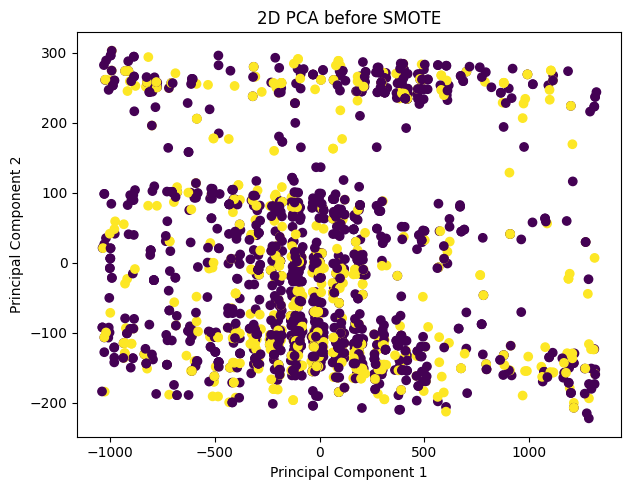

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('2D PCA before SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


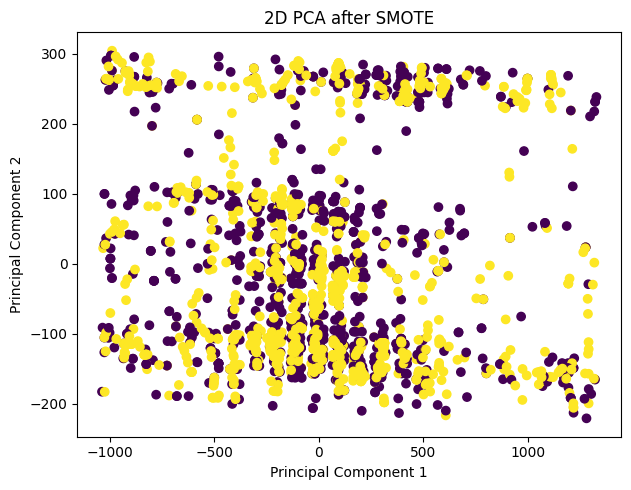

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_OS)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y_OS

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_OS, cmap='viridis')
plt.title('2D PCA after SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [224]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchbnn as bnn
import matplotlib.pyplot as plt

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)


In [225]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_OS.values)
X_test_normalized = scaler.transform(X_test.values)


os_x_train_tensor = torch.FloatTensor(X_train_normalized)
os_y_train_tensor = torch.FloatTensor(y_OS.values)

X_train_normalized = scaler.transform(X_train.values)

x_train_tensor = torch.FloatTensor(X_train_normalized)
y_train_tensor = torch.FloatTensor(y_train.values)
x_test_tensor = torch.FloatTensor(X_test_normalized)
y_test_tensor = torch.FloatTensor(y_test.values)

In [226]:
len(os_x_train_tensor)

1962

In [227]:
len(x_train_tensor)

1428

## Ensamble


In [228]:
import pandas as pd

corr_matrix = pd.concat([x,y],axis=1).corr()

target_corr = corr_matrix['DV']

sorted_corr = target_corr.abs().sort_values(ascending=False)

top_features = sorted_corr.index[1:] 

top_corr_values = target_corr[top_features]

result_df = pd.DataFrame({'Feature': top_features, 'Correlation': top_corr_values})
print(result_df)

                                       Feature  Correlation
Property Damage                Property Damage    -0.371355
Belts                                    Belts     0.157717
TimeCategory_non-peak    TimeCategory_non-peak    -0.085160
TimeCategory_am-peak      TimeCategory_am-peak     0.075678
Commercial License          Commercial License     0.057843
VehicleType_Medium          VehicleType_Medium    -0.055274
WDF5                                      WDF5     0.048520
VehicleType_Heavy            VehicleType_Heavy     0.046390
Gender                                  Gender    -0.039646
Race_HISPANIC                    Race_HISPANIC    -0.038434
WSF5                                      WSF5     0.038255
AWND                                      AWND     0.035679
WSF2                                      WSF2     0.034770
TimeCategory_mid-peak    TimeCategory_mid-peak     0.032074
SinOfTime                            SinOfTime     0.028265
TMAX                                    

### Random Forest and Decision Trees

In [229]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
from skopt import gp_minimize
from skopt.space import Real, Integer,Categorical
from skopt.utils import use_named_args
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.int=np.int_

search_space = [
    Categorical(['gini', 'entropy', 'log_loss'], name='criterion'),
    Integer(1, 100, name='max_depth'),
    Integer(1, 4, name='n_jobs'),
    Real(0.1, 1.0, name='max_samples')]

def bayesian_optimization_tree(x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor, search_space, n_calls=10):
    @use_named_args(search_space)
    def evaluate_model(criterion, max_depth, 
                       n_jobs, max_samples):

        model = RandomForestClassifier(
            n_estimators=200,
            criterion=criterion,
            max_depth=max_depth,
            n_jobs=n_jobs,
            random_state=42,
            verbose=0,
            max_samples=max_samples
        )

        model.fit(x_train_tensor, y_train_tensor)

        test_predicted = model.predict(x_test_tensor)
        test_accuracy = accuracy_score(test_predicted, y_test_tensor)

        return 1-test_accuracy

    result = gp_minimize(evaluate_model, dimensions=search_space, n_calls=n_calls)
    print('Best Accuracy: %.3f' % (1.0 - result.fun))
    print('Best Parameters:', result.x)

    return result

result= bayesian_optimization_tree(X_train, y_train, X_test, y_test, search_space, n_calls=30)


Best Accuracy: 0.757
Best Parameters: ['log_loss', 57, 2, 0.6612959431986446]


In [230]:
result.x

['log_loss', 57, 2, 0.6612959431986446]

In [231]:

clf = RandomForestClassifier(n_estimators=200,criterion=result.x[0],max_depth=result.x[1], n_jobs=result.x[2],max_samples=result.x[3],random_state=42,)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.7569832402234636

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       246
           1       0.68      0.43      0.52       112

    accuracy                           0.76       358
   macro avg       0.73      0.67      0.68       358
weighted avg       0.75      0.76      0.74       358



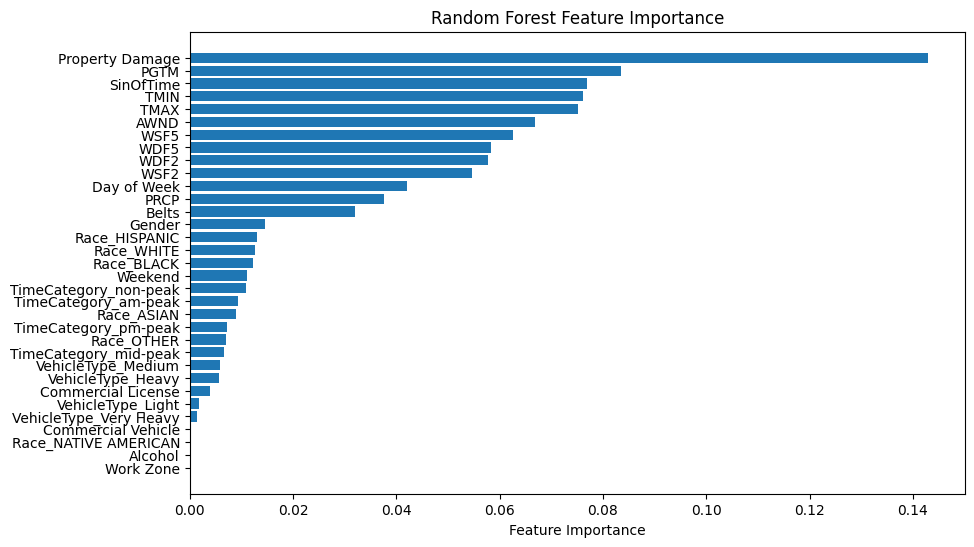

In [232]:
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_
feature_names = x.columns 

sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [233]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=200,criterion=result.x[0],max_depth=result.x[1], n_jobs=result.x[2],max_samples=result.x[3],random_state=42)

sfs = SequentialFeatureSelector(clf, n_features_to_select=32, direction='backward')

sfs.fit(X_train, y_train)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

selected_features = X_train.columns[sfs.get_support()]

X_train_selected = sfs.transform(X_train)
X_val_selected = sfs.transform(X_test)

clf.fit(X_train_selected, y_train)
y_val_pred = clf.predict(X_val_selected)
classification_rep = classification_report(y_test, y_pred)

print("Selected Features:", selected_features)
print("Validation Accuracy:", accuracy)
print('Classification Report:\n',classification_rep)

Selected Features: Index(['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'SinOfTime', 'Weekend', 'Gender', 'AWND',
       'PGTM', 'TMAX', 'WSF2', 'WSF5', 'TMIN', 'WDF2', 'WDF5',
       'VehicleType_Heavy', 'Day of Week', 'VehicleType_Light',
       'VehicleType_Medium', 'VehicleType_Very Heavy', 'Race_ASIAN',
       'Race_BLACK', 'Race_HISPANIC', 'Race_NATIVE AMERICAN', 'Race_OTHER',
       'Race_WHITE', 'TimeCategory_am-peak', 'TimeCategory_mid-peak',
       'TimeCategory_non-peak', 'TimeCategory_pm-peak'],
      dtype='object')
Validation Accuracy: 0.7569832402234636
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       246
           1       0.68      0.43      0.52       112

    accuracy                           0.76       358
   macro avg       0.73      0.67      0.68       358
weighted avg       0.75      0.76      0.74       358



In [234]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

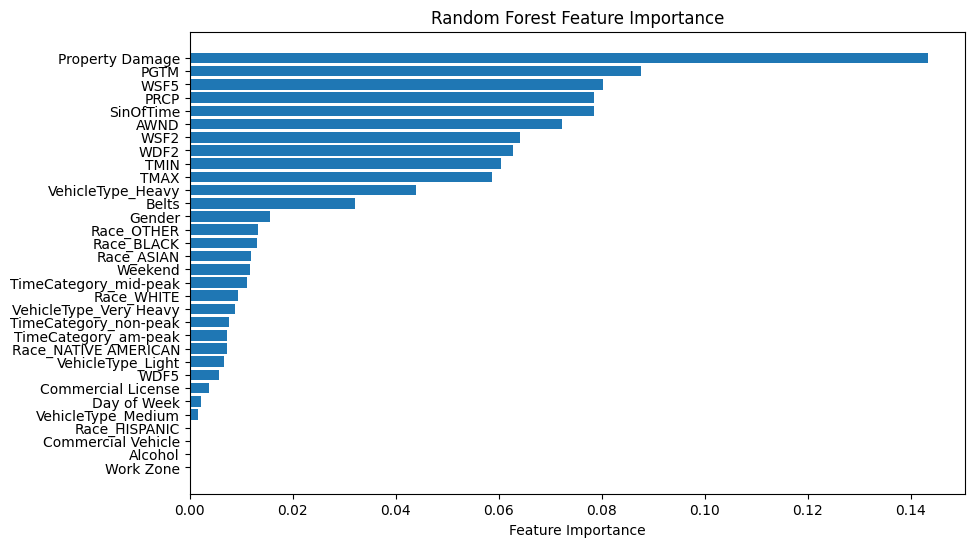

In [235]:
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_
feature_names = x.columns 

sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [236]:
selected_features

Index(['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'SinOfTime', 'Weekend', 'Gender', 'AWND',
       'PGTM', 'TMAX', 'WSF2', 'WSF5', 'TMIN', 'WDF2', 'WDF5',
       'VehicleType_Heavy', 'Day of Week', 'VehicleType_Light',
       'VehicleType_Medium', 'VehicleType_Very Heavy', 'Race_ASIAN',
       'Race_BLACK', 'Race_HISPANIC', 'Race_NATIVE AMERICAN', 'Race_OTHER',
       'Race_WHITE', 'TimeCategory_am-peak', 'TimeCategory_mid-peak',
       'TimeCategory_non-peak', 'TimeCategory_pm-peak'],
      dtype='object')

In [237]:
result= bayesian_optimization_tree(X_train_selected, y_train, X_test_selected, y_test, search_space, n_calls=30)

Best Accuracy: 0.765
Best Parameters: ['gini', 80, 2, 0.5929836672952634]


In [238]:
clf = RandomForestClassifier(n_estimators=200,criterion=result.x[0],max_depth=result.x[1], n_jobs=result.x[2],max_samples=result.x[3],random_state=42)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       246
           1       0.71      0.42      0.53       112

    accuracy                           0.77       358
   macro avg       0.74      0.67      0.69       358
weighted avg       0.76      0.77      0.75       358



-----------------------